# Graphs

## Different types of graphs

In [116]:
class baseGraph:
    def __init__(self, n):
        """ Ініціалізує порожній граф.
        
        n - кількість вершин
        """
        self.num_vertices = n
        self.graph = {i+1: [] for i in range(n)}  # Порожній граф у вигляді списку суміжності {1: [], 2: [] ... }

    def add_vertex(self):
        """ Додає нову вершину до графа. """
        self.num_vertices += 1  # Збільшуємо кількість вершин
        self.graph[self.num_vertices] = []  # Додаємо нову вершину з порожнім списком сусідів
    
    def del_vertex(self, v):
        """ Видаляє вершину v і всі пов'язані з нею ребра. """
        if v in self.graph:
            # Видаляємо всі ребра, пов'язані з вершиною v
            for neighbor in self.graph[v]:
                if v in self.graph[neighbor]:  # Перевіряємо наявність v серед сусідів
                    self.graph[neighbor].remove(v)  # Видаляємо v з сусідів кожної вершини
            # Видаляємо саму вершину
            del self.graph[v]
            self.num_vertices -= 1  # Зменшуємо кількість вершин
        else:
            print(f"Вершина {v} не існує.")

    def to_adjacency_matrix(self):
        """ Перетворює граф зі списку суміжності у матрицю суміжності. """
        # Ініціалізуємо матрицю розміром num_vertices x num_vertices з нулями
        matrix = [[0] * self.num_vertices for _ in range(self.num_vertices)]
        
        for vertex, neighbors in self.graph.items():
            for neighbor in neighbors:
                if isinstance(neighbor, tuple):
                    # Якщо граф зважений, присвоюємо вагу ребра
                    matrix[vertex-1][neighbor[0]-1] = neighbor[1]
                else:
                    # Якщо граф незважений, просто ставимо 1
                    matrix[vertex-1][neighbor-1] = 1
        return matrix

    def to_adjacency_list(self, matrix, weighted=False):
        """ Перетворює граф з матриці суміжності у список суміжності.
        
        matrix - матриця суміжності
        weighted - булевий параметр, який вказує, чи граф є зваженим
        """
        self.num_vertices = len(matrix)
        self.graph = {i+1: [] for i in range(self.num_vertices)}  # Очищаємо граф і створюємо новий список суміжності

        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if matrix[i][j] != 0:  # Якщо є ребро
                    if weighted:
                        # Якщо граф зважений, додаємо кортеж (вершина, вага)
                        self.graph[i+1].append((j+1, matrix[i][j]))
                    else:
                        # Якщо граф незважений, додаємо тільки вершину
                        self.graph[i+1].append(j+1)
                        
    def show(self):
        """ Виводить граф у вигляді списку суміжності. """
        for vertex in self.graph:
            print(f"{vertex}: {self.graph[vertex]}")

    def show_matrix(self):
        """ Виводить граф у вигляді матриці суміжності. """
        matrix = self.to_adjacency_matrix()
        for row in matrix:
            print(row)
    
    def makeNonOriented(self):
        """ Робить граф неорієнтованим, додаючи зворотні ребра. """
        for vertex, neighbors in self.graph.items():
            for neighbor in neighbors:
                # Додаємо зворотне ребро, якщо його ще немає
                if vertex not in self.graph[neighbor]:
                    self.graph[neighbor].append(vertex)




In [117]:
class Graph(baseGraph):
    def add_edge(self, u, v):
        """ Додає ребро (u <--> v) """
        # перевірка чи існують вершини
        if u in self.graph and v in self.graph:
            if v not in self.graph[u]:
                self.graph[u].append(v)
                self.graph[v].append(u)
            else:
                print(f"Ребро між {u} і {v} вже існує.")
        else:
            print(f"Одна з вершин {u} або {v} не існує.")
    
    def del_edge(self, u, v):
        """ Видаляє ребро (u <--> v) """
        # перевірка чи існують вершини
        if u in self.graph and v in self.graph:
            # Перевірка, чи вже існує ребро
            if v in self.graph[u]:
                self.graph[u].remove(v)
                self.graph[v].remove(u)
            else:
                print(f"Ребра між {u} і {v} не існує.")
        else:
            print(f"Одна з вершин {u} або {v} не існує.")




In [118]:
class weightedGraph(baseGraph):
    def add_edge(self, u, v, w):
        """ Додає зважене ребро (u <--w--> v). """
        if u in self.graph and v in self.graph:
            # Перевірка, чи вже існує ребро
            if not any(x[0] == v for x in self.graph[u]):
                self.graph[u].append((v, w))
                self.graph[v].append((u, w))
            else:
                print(f"Ребро між {u} і {v} вже існує.")
        else:
            print(f"Одна з вершин {u} або {v} не існує.")
    
    def del_edge(self, u, v):
        """ Видаляє зважене ребро (u <--w--> v). """
        if u in self.graph and v in self.graph:
            # Перевірка, чи існує ребро перед видаленням
            if any(x[0] == v for x in self.graph[u]):
                # Видаляємо ребро (u -> v)
                self.graph[u] = [x for x in self.graph[u] if x[0] != v]
                # Видаляємо ребро (v -> u)
                self.graph[v] = [x for x in self.graph[v] if x[0] != u]
            else:
                print(f"Ребра між {u} і {v} не існує.")
        else:
            print(f"Одна з вершин {u} або {v} не існує.")


In [125]:
class orientedGraph(baseGraph):
    def add_edge(self, u, v):
        """Додає орієнтоване ребро (u --> v)."""
        if u in self.graph and v in self.graph:
            # Перевіряємо, чи вже існує орієнтоване ребро
            if v not in self.graph[u]:
                self.graph[u].append(v)
            else:
                raise ValueError(f"Ребро (u -> v) вже існує.")
        else:
            raise ValueError(f"Одна з вершин {u} або {v} не існує.")
    
    def del_edge(self, u, v):
        """Видаляє орієнтоване ребро (u --> v)."""
        if u in self.graph and v in self.graph:
            # Перевіряємо, чи існує орієнтоване ребро перед видаленням
            if v in self.graph[u]:
                self.graph[u].remove(v)
            else: 
                raise ValueError(f"Ребра (u -> v) не існує.")
        else:
            raise ValueError(f"Одна з вершин {u} або {v} не існує.")





In [120]:
class orientedWeightedGraph(baseGraph):
    def add_edge(self, u, v, w):
        """ Додає орієнтоване зважене ребро (u --w--> v). """
        if u in self.graph and v in self.graph:
            # Перевіряємо, чи вже існує орієнтоване зважене ребро
            if not any(x[0] == v for x in self.graph[u]):
                self.graph[u].append((v, w))
            else:
                print(f"Ребро (u --w--> v) вже існує.")
        else:
            print(f"Одна з вершин {u} або {v} не існує.")
    
    def del_edge(self, u, v):
        """ Видаляє орієнтоване зважене ребро (u --w--> v). """
        if u in self.graph and v in self.graph:
            # Перевіряємо, чи існує орієнтоване зважене ребро перед видаленням
            if any(x[0] == v for x in self.graph[u]):
                self.graph[u] = [x for x in self.graph[u] if x[0] != v]
            else:
                print(f"Ребра (u --w--> v) не існує.")
        else:
            print(f"Одна з вершин {u} або {v} не існує.")



## Random generation of graphs

In [6]:
import random

In [121]:
class randomOrientedGraph(orientedGraph):
    def __init__(self, n, p):
        """
        Ініціалізує випадковий граф у моделі Ердеша-Шеньї.
        
        n - кількість вершин
        p - ймовірність наявності ребра між будь-якими двома вершинами
        """
        super().__init__(n)  # Викликаємо конструктор базового графа
        self.generate_random_graph(p)

    def generate_random_graph(self, p):
        """ Генерує випадковий граф з імовірністю p для кожної пари вершин. """
        for i in range(1, self.num_vertices + 1):
            for j in range(1, self.num_vertices + 1):  # Проходимо по всіх парах вершин (i < j)
                if i != j and random.random() < p:  # Якщо випадкове число менше за p, додаємо ребро
                    self.add_edge(i, j)

In [122]:
class randomOrientedWeightedGraph(orientedWeightedGraph):
    def __init__(self, n, p, min_weight=1, max_weight=10):
        """
        Ініціалізує випадковий зважений граф у моделі Ердеша-Шеньї.
        
        n - кількість вершин
        p - ймовірність наявності ребра між будь-якими двома вершинами
        max_weight - максимальна вага для ребра
        """
        super().__init__(n)
        self.generate_random_graph(p, min_weight, max_weight)

    def generate_random_graph(self, p, min_weight, max_weight):
        """ Генерує випадковий зважений граф з ймовірністю p для кожної пари вершин. """
        for i in range(1, self.num_vertices + 1):
            for j in range(1, self.num_vertices + 1):
                if random.random() < p:
                    weight = random.randint(min_weight, max_weight)  # Генеруємо випадкову вагу
                    self.add_edge(i, j, weight)


## Вимірювання швидкості функцій

In [96]:
import time
import matplotlib.pyplot as plt

In [103]:
def measure_creation_time(max_vertices, iterations=1000):
    results = []
    
    for n in range(1, max_vertices + 1, 25):  
        total_time = 0
        
        for _ in range(iterations):
            start_time = time.time()
            graph = baseGraph(n)
            total_time += time.time() - start_time
            
        avg_time = total_time / iterations
        results.append((n, avg_time))
        
    return results


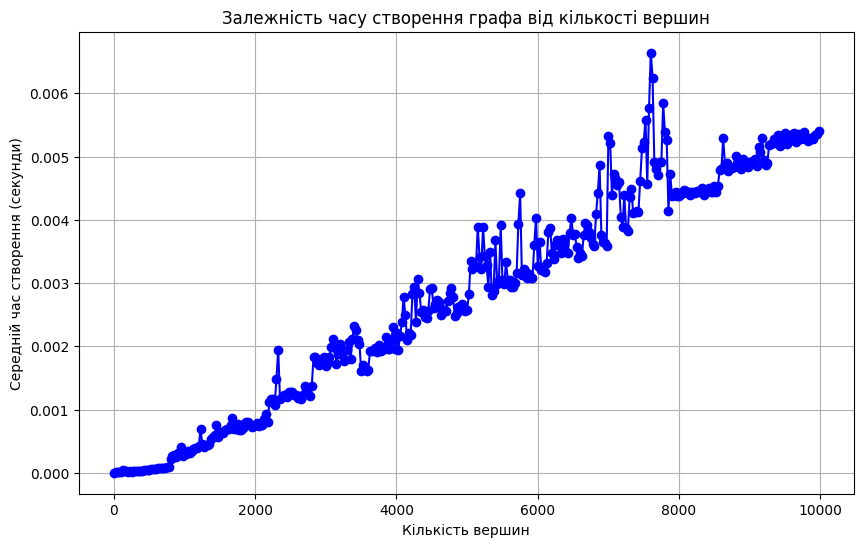

In [104]:

# Виклик функції для збору даних
max_vertices = 10000  # максимальна кількість вершин для перевірки
results = measure_creation_time(max_vertices)

# Побудова графіку
vertices, times = zip(*results)

plt.figure(figsize=(10, 6))
plt.plot(vertices, times, marker='o', linestyle='-', color='b')
plt.title('Залежність часу створення графа від кількості вершин')
plt.xlabel('Кількість вершин')
plt.ylabel('Середній час створення (секунди)')
plt.grid(True)
plt.show()


In [123]:
def measure_add_vertex_time(max_vertices, iterations=1000):
    results = []
    
    for n in range(1, max_vertices + 1, 50):  # Крок 50
        total_time = 0
        
        for _ in range(iterations):
            graph = baseGraph(n)
            start_time = time.time()
            graph.add_vertex()  # Додаємо нову вершину
            total_time += time.time() - start_time
            
        avg_time = total_time / iterations
        results.append((n, avg_time))
        
    return results

def measure_del_vertex_time(max_vertices, p, iterations=1000):
    results = []
    for n in range(1, max_vertices + 1, 50):  # Крок 50
        total_time = 0
        
        for _ in range(iterations):
            graph = randomOrientedGraph(n, p)
            vertex_to_delete = random.randint(1, n)  # Випадково вибираємо вершину для видалення
            start_time = time.time()
            graph.del_vertex(vertex_to_delete)  # Видаляємо вершину
            total_time += time.time() - start_time
            
        avg_time = total_time / iterations
        results.append((n, avg_time))
        
    return results


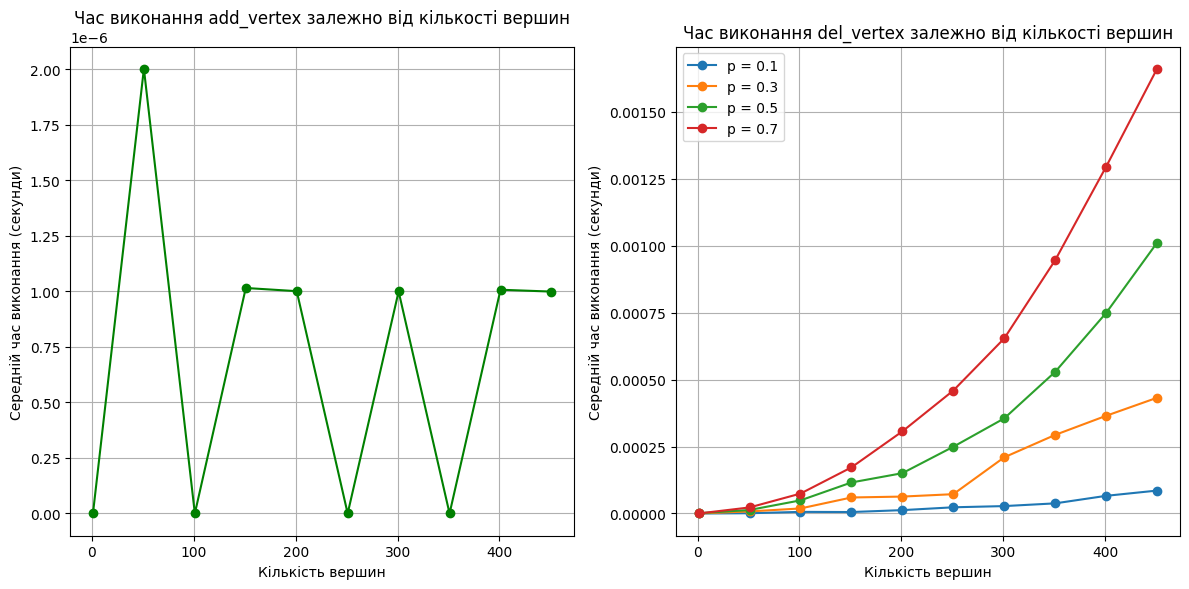

In [124]:
# Вимірювання часу
max_vertices = 500

# Вимірюємо час додавання вершини
add_results = measure_add_vertex_time(max_vertices)

# Побудова графіків
vertices_add, times_add = zip(*add_results)

# Вимірюємо час видалення вершини для кожного значення ймовірності p
p_values = [0.1, 0.3, 0.5, 0.7]

plt.figure(figsize=(12, 6))

# Графік часу для add_vertex
plt.subplot(1, 2, 1)
plt.plot(vertices_add, times_add, marker='o', linestyle='-', color='g')
plt.title('Час виконання add_vertex залежно від кількості вершин')
plt.xlabel('Кількість вершин')
plt.ylabel('Середній час виконання (секунди)')
plt.grid(True)

# Графік часу для del_vertex
plt.subplot(1, 2, 2)
for p in p_values:
    del_results = measure_del_vertex_time(max_vertices, p)
    vertices_del, times_del = zip(*del_results)
    plt.plot(vertices_del, times_del, marker='o', linestyle='-', label=f'p = {p}')
    
plt.title('Час виконання del_vertex залежно від кількості вершин')
plt.xlabel('Кількість вершин')
plt.ylabel('Середній час виконання (секунди)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [136]:
def measure_add_del_edge_time(max_vertices, p, iterations=1000):
    results = []
    
    for n in range(1, max_vertices + 1, 50):  
        total_time_add = 0
        total_time_del = 0

        for _ in range(iterations):
            graph = randomOrientedGraph(n, p)

            
            x1 = random.randint(1, n)
            y1 = random.randint(1, n)
            x2 = random.randint(1, n)
            y2 = random.randint(1, n)
            
            start_time_add = time.time()
            try:
                graph.add_edge(x1, y1)
            except ValueError:
                continue  
            total_time_add += time.time() - start_time_add

            start_time_del = time.time()
            try:
                graph.del_edge(x2, y2)
            except ValueError:
                continue  
            total_time_del += time.time() - start_time_del

        avg_time_add = total_time_add / iterations
        avg_time_del = total_time_del / iterations
        results.append((n, avg_time_add, avg_time_del))

    return results

        

Ребра (u -> v) не існує.
Ребра (u -> v) не існує.
Ребра (u -> v) не існує.
Ребро (u -> v) вже існує.
Ребра (u -> v) не існує.
Ребро (u -> v) вже існує.
Ребра (u -> v) не існує.
Ребро (u -> v) вже існує.
Ребро (u -> v) вже існує.
Ребра (u -> v) не існує.
Ребро (u -> v) вже існує.
Ребра (u -> v) не існує.
Ребро (u -> v) вже існує.
Ребра (u -> v) не існує.
Ребро (u -> v) вже існує.
Ребра (u -> v) не існує.
Ребра (u -> v) не існує.
Ребра (u -> v) не існує.
Ребро (u -> v) вже існує.
Ребра (u -> v) не існує.
Ребра (u -> v) не існує.
Ребро (u -> v) вже існує.
Ребра (u -> v) не існує.
Ребро (u -> v) вже існує.
Ребра (u -> v) не існує.
Ребра (u -> v) не існує.
Ребро (u -> v) вже існує.
Ребра (u -> v) не існує.
Ребро (u -> v) вже існує.
Ребро (u -> v) вже існує.
Ребра (u -> v) не існує.
Ребра (u -> v) не існує.
Ребро (u -> v) вже існує.
Ребра (u -> v) не існує.
Ребро (u -> v) вже існує.
Ребро (u -> v) вже існує.
Ребро (u -> v) вже існує.
Ребро (u -> v) вже існує.
Ребра (u -> v) не існує.
Ребро (

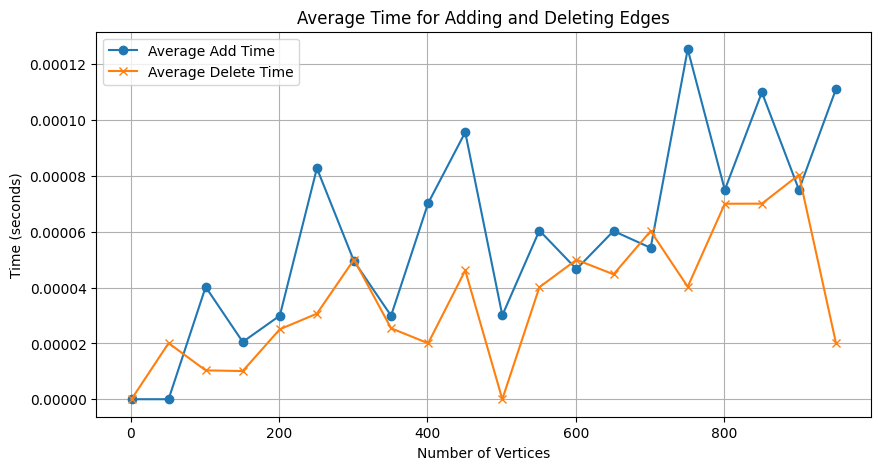

In [138]:
def plot_results(results):
    vertices = [n for n, _, _ in results]
    avg_time_add = [add_time for _, add_time, _ in results]
    avg_time_del = [del_time for _, _, del_time in results]

    plt.figure(figsize=(10, 5))
    plt.plot(vertices, avg_time_add, label='Average Add Time', marker='o')
    plt.plot(vertices, avg_time_del, label='Average Delete Time', marker='x')
    
    plt.title('Average Time for Adding and Deleting Edges')
    plt.xlabel('Number of Vertices')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.grid()
    plt.show()

# Пример использования
max_vertices = 1000
p = 0.5
iterations = 100

results = measure_add_del_edge_time(max_vertices, p, iterations)
plot_results(results)

In [109]:
def measure_random_graph_time(max_vertices, p, iterations=100):
    results = []
    
    for n in range(1, max_vertices + 1, 50):  # Крок 50 для прискорення
        total_time = 0
        
        for _ in range(iterations):
            start_time = time.time()
            graph = randomOrientedGraph(n, p)  # Створюємо випадковий граф
            total_time += time.time() - start_time
            
        avg_time = total_time / iterations
        results.append((n, avg_time))
        
    return results


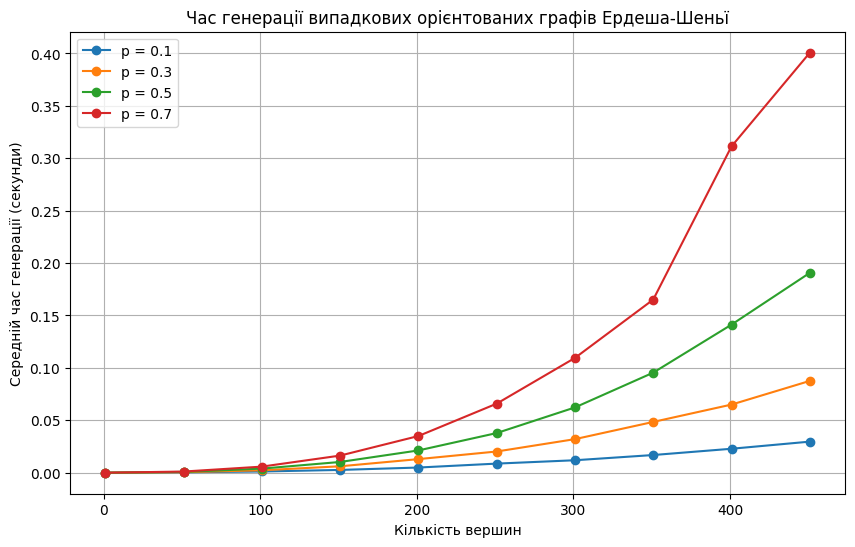

In [110]:

# Вимірювання часу для різних ймовірностей p
max_vertices = 500  # Максимальна кількість вершин для тесту
p_values = [0.1, 0.3, 0.5, 0.7]  # Різні ймовірності для графу Ердеша-Шеньї

# Підготовка графіків
plt.figure(figsize=(10, 6))

for p in p_values:
    random_graph_results = measure_random_graph_time(max_vertices, p)
    vertices, times = zip(*random_graph_results)
    plt.plot(vertices, times, marker='o', linestyle='-', label=f'p = {p}')

# Оформлення графіку
plt.title('Час генерації випадкових орієнтованих графів Ердеша-Шеньї')
plt.xlabel('Кількість вершин')
plt.ylabel('Середній час генерації (секунди)')
plt.grid(True)
plt.legend()
plt.show()
